<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Partie-traitement-d'images-" data-toc-modified-id="Partie-traitement-d'images--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Partie traitement d'images </a></span></li><li><span><a href="#Définition-et-utilisation-de-la-distance" data-toc-modified-id="Définition-et-utilisation-de-la-distance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Définition et utilisation de la distance</a></span></li><li><span><a href="#L'algorithme-knn" data-toc-modified-id="L'algorithme-knn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>L'algorithme knn</a></span></li><li><span><a href="#Test-avec-des-images-modifiées" data-toc-modified-id="Test-avec-des-images-modifiées-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test avec des images modifiées</a></span></li><li><span><a href="#Machine-learning-paroposé-par-des-formateurs-de-l'académie-de-Reims" data-toc-modified-id="Machine-learning-paroposé-par-des-formateurs-de-l'académie-de-Reims-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Machine learning proposé par des formateurs de l'académie de Reims</a></span></li></ul></div>

# K plus proches voisins

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from random import *

<h2>Partie traitement d'images </h2>

In [2]:
def affiche(txt,tab_image):
    "Affiche une fenetre avec le texte et le tableau sous forme d'image"
    plt.figure(figsize=(28,28));
    plt.title("%s "%str(txt))
    plt.imshow(tab_image, cmap='Greys', interpolation='None')
    plt.show()


def chargement(nom_fichier):
    "Charge le fichier csv et renvoie la liste des valeurs et la liste des images qui y sont présentes"
    f = open(nom_fichier, 'r')
    a = f.readlines()
    f.close()

    liste_valeurs,liste_images=[],[]
    for line in a:
        linebits = line.split(',')
        liste_valeurs.append(int(linebits[0]))
        liste_images.append(np.asfarray(linebits[1:]).reshape((28,28))) # Transforme les nombres en une matrice 28 par 28

    return liste_valeurs,liste_images




In [3]:
Image7=np.array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  84., 185., 159., 151.,  60.,
         36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 222., 254., 254., 254., 254.,
        241., 198., 198., 198., 198., 198., 198., 198., 198., 170.,  52.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  67., 114.,  72., 114., 163.,
        227., 254., 225., 254., 254., 254., 250., 229., 254., 254., 140.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         17.,  66.,  14.,  67.,  67.,  67.,  59.,  21., 236., 254., 106.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  83., 253., 209.,  18.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  22., 233., 255.,  83.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 129., 254., 238.,  44.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  59., 249., 254.,  62.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 133., 254., 187.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   9., 205., 248.,  58.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 126., 254., 182.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  75., 251., 240.,  57.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  19., 221., 254., 166.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3., 203., 254., 219.,  35.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  38., 254., 254.,  77.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         31., 224., 254., 115.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        133., 254., 254.,  52.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  61.,
        242., 254., 254.,  52.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 121.,
        254., 254., 219.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 121.,
        254., 207.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]])

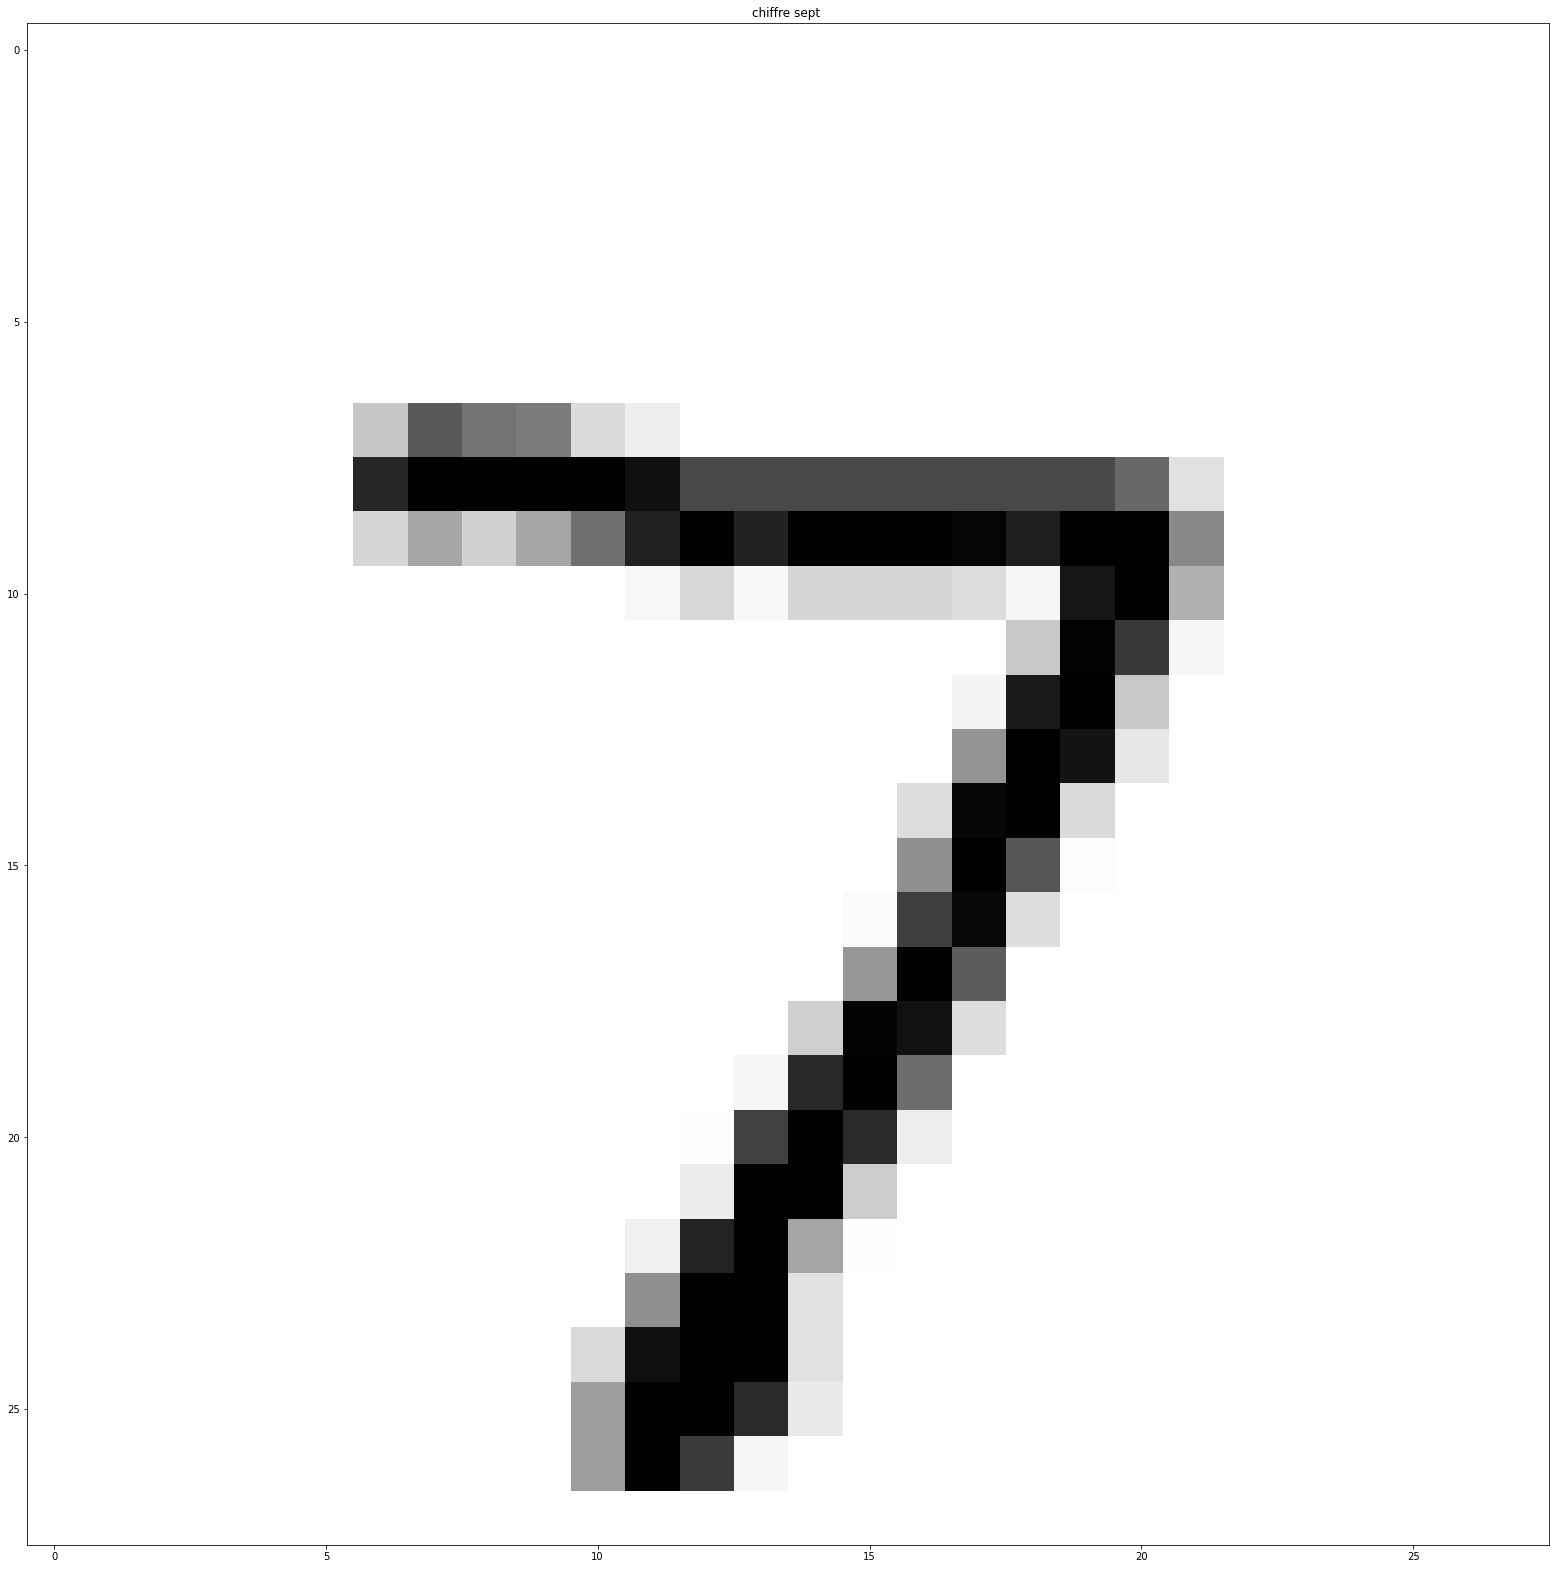

In [4]:
affiche('chiffre sept',Image7)


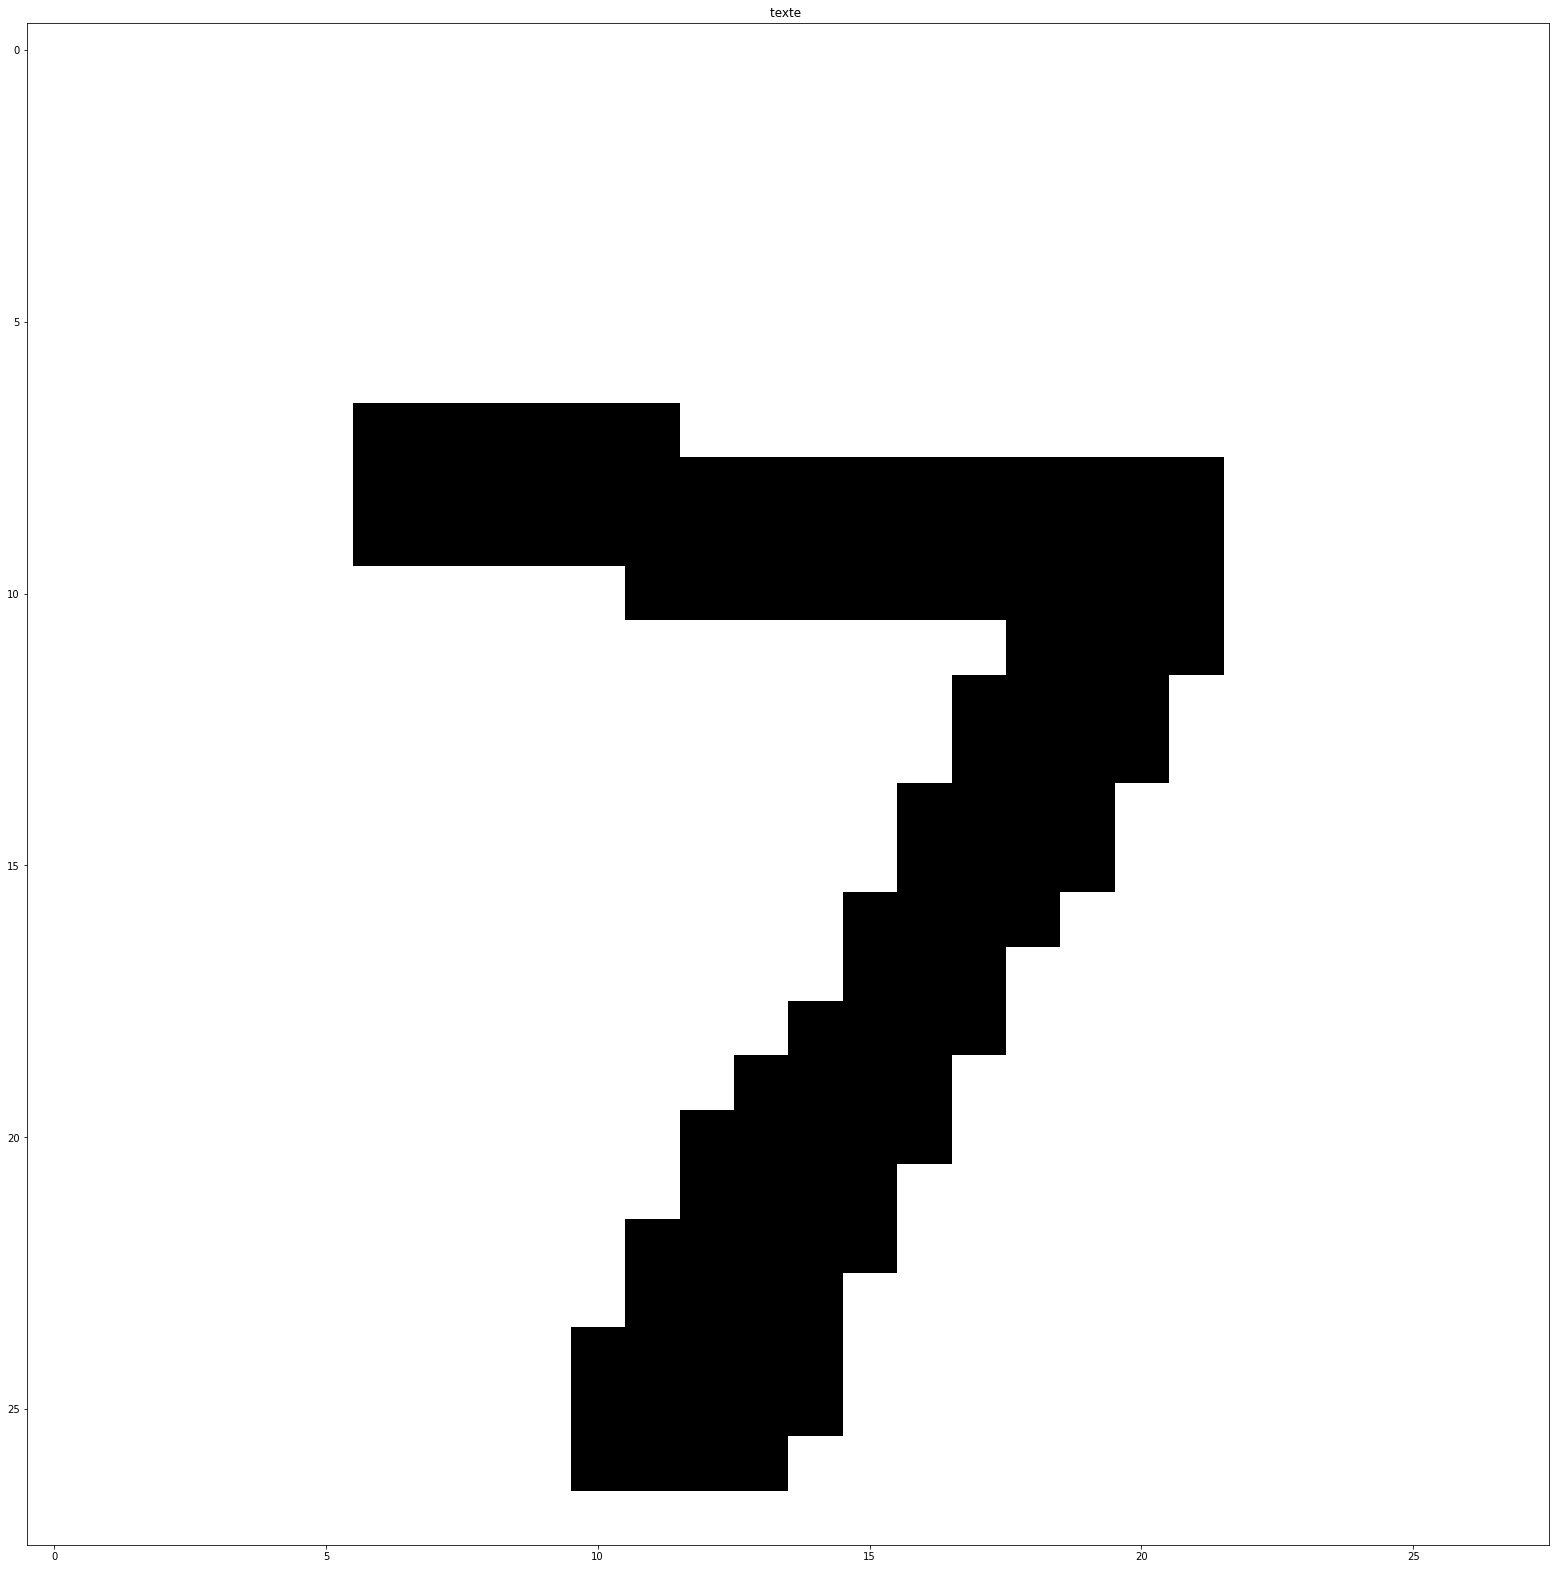

In [5]:
Image7Modif=np.copy(Image7)

Image7Modif[Image7Modif !=0]=255

affiche('texte',Image7Modif)

<h2>Définition et utilisation de la distance</h2>

In [6]:
def distance(img1,img2):
    "Renvoie la distance entre deux images"
    "On calcule la moyenne des écarts entre chaque pixels"
    "N'hésitez pas à modifier cette distance, par exemple en écrivant la distance euclidienne ou de Tchebichev"
    imgdiff=abs(img1-img2)  #La matrice des écarts
    return imgdiff.mean()   #On renvoie la moyenne de ces écarts.


In [7]:
distance(Image7,Image7)

0.0

In [8]:
distance(Image7,Image7Modif)

14.191326530612244

<h2>L'algorithme knn</h2>

In [9]:

def K_PlusProchesVoisins(mon_image,limg,lval,k=10):
    ldistval=[] # liste de la distance et de la valeur de chacune des images de la liste limg à mon_image
    for i in range(len(lval)):
        ldistval.append([distance(mon_image,limg[i]),lval[i]])
    ldistval.sort() #On trie cette liste selon les distaces

    # print(ldistval) pour debug
    
    ListeK=[]
    for i in range(k):
        ListeK.append(ldistval[i][1])
    
    # print(ListeK) pour debug
    
    nb=[ListeK.count(i) for i in range(10)]
    return nb.index(max(nb))



<h2>Test avec des images modifiées</h2>

In [10]:
liste_valeurs,liste_images=chargement("mnist_test.csv")

mon_image=Image7Modif
limg=liste_images
lval=liste_valeurs

K_PlusProchesVoisins(mon_image,limg,lval,k=27)


7

In [11]:
Erreur=np.array([np.random.randint(0, 256,28) for i in range(28)])
K_PlusProchesVoisins(Erreur,limg,lval,k=10)

0

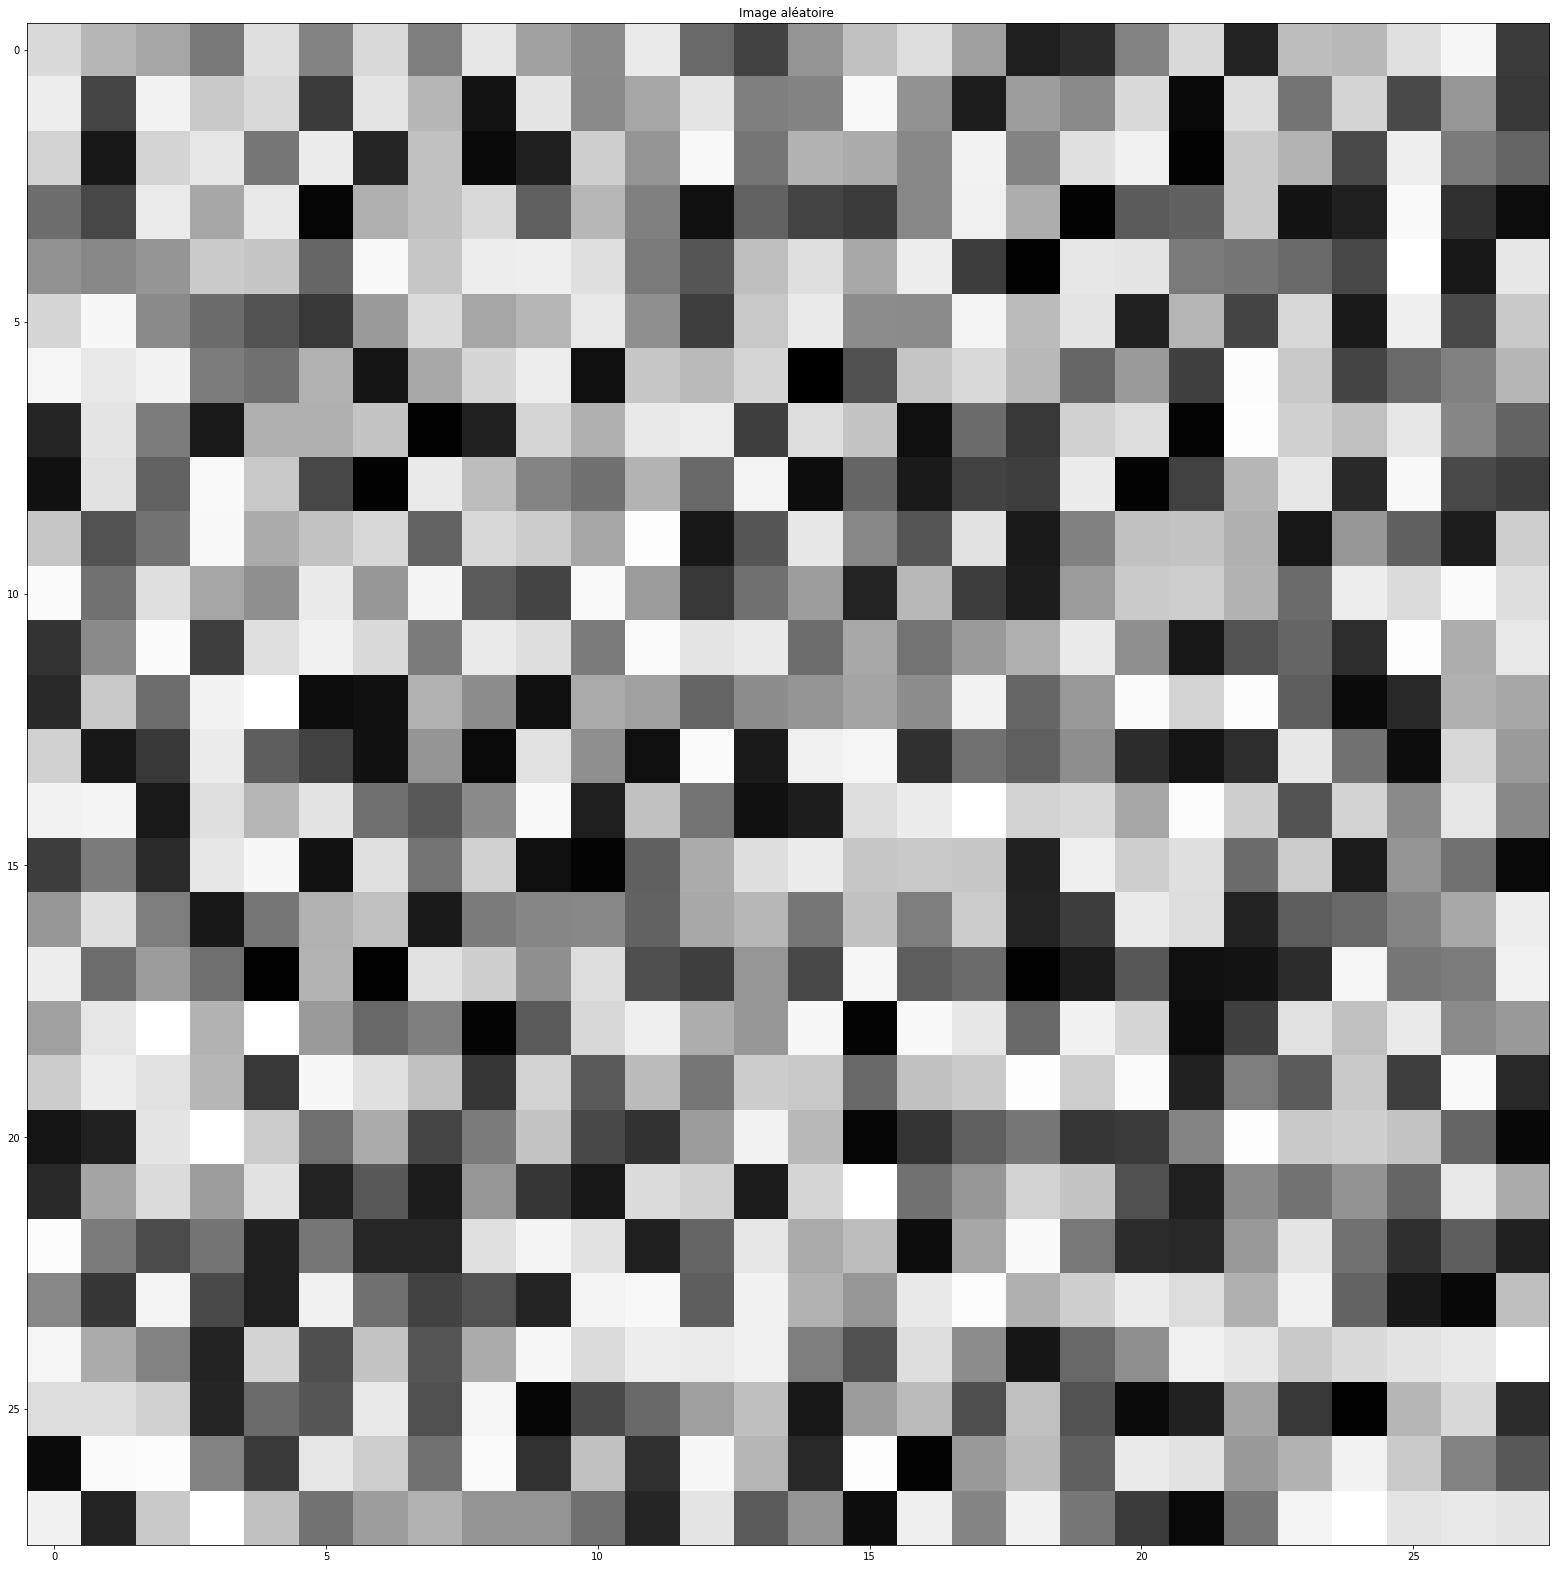

In [12]:
affiche('Image aléatoire',Erreur)

In [13]:
ImageVide=np.array([[0 for i in range(28)] for i in range(28)])
K_PlusProchesVoisins(ImageVide,limg,lval,k=10)

1

In [14]:
l=np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ImageTest=np.array([l for i in range(28)])

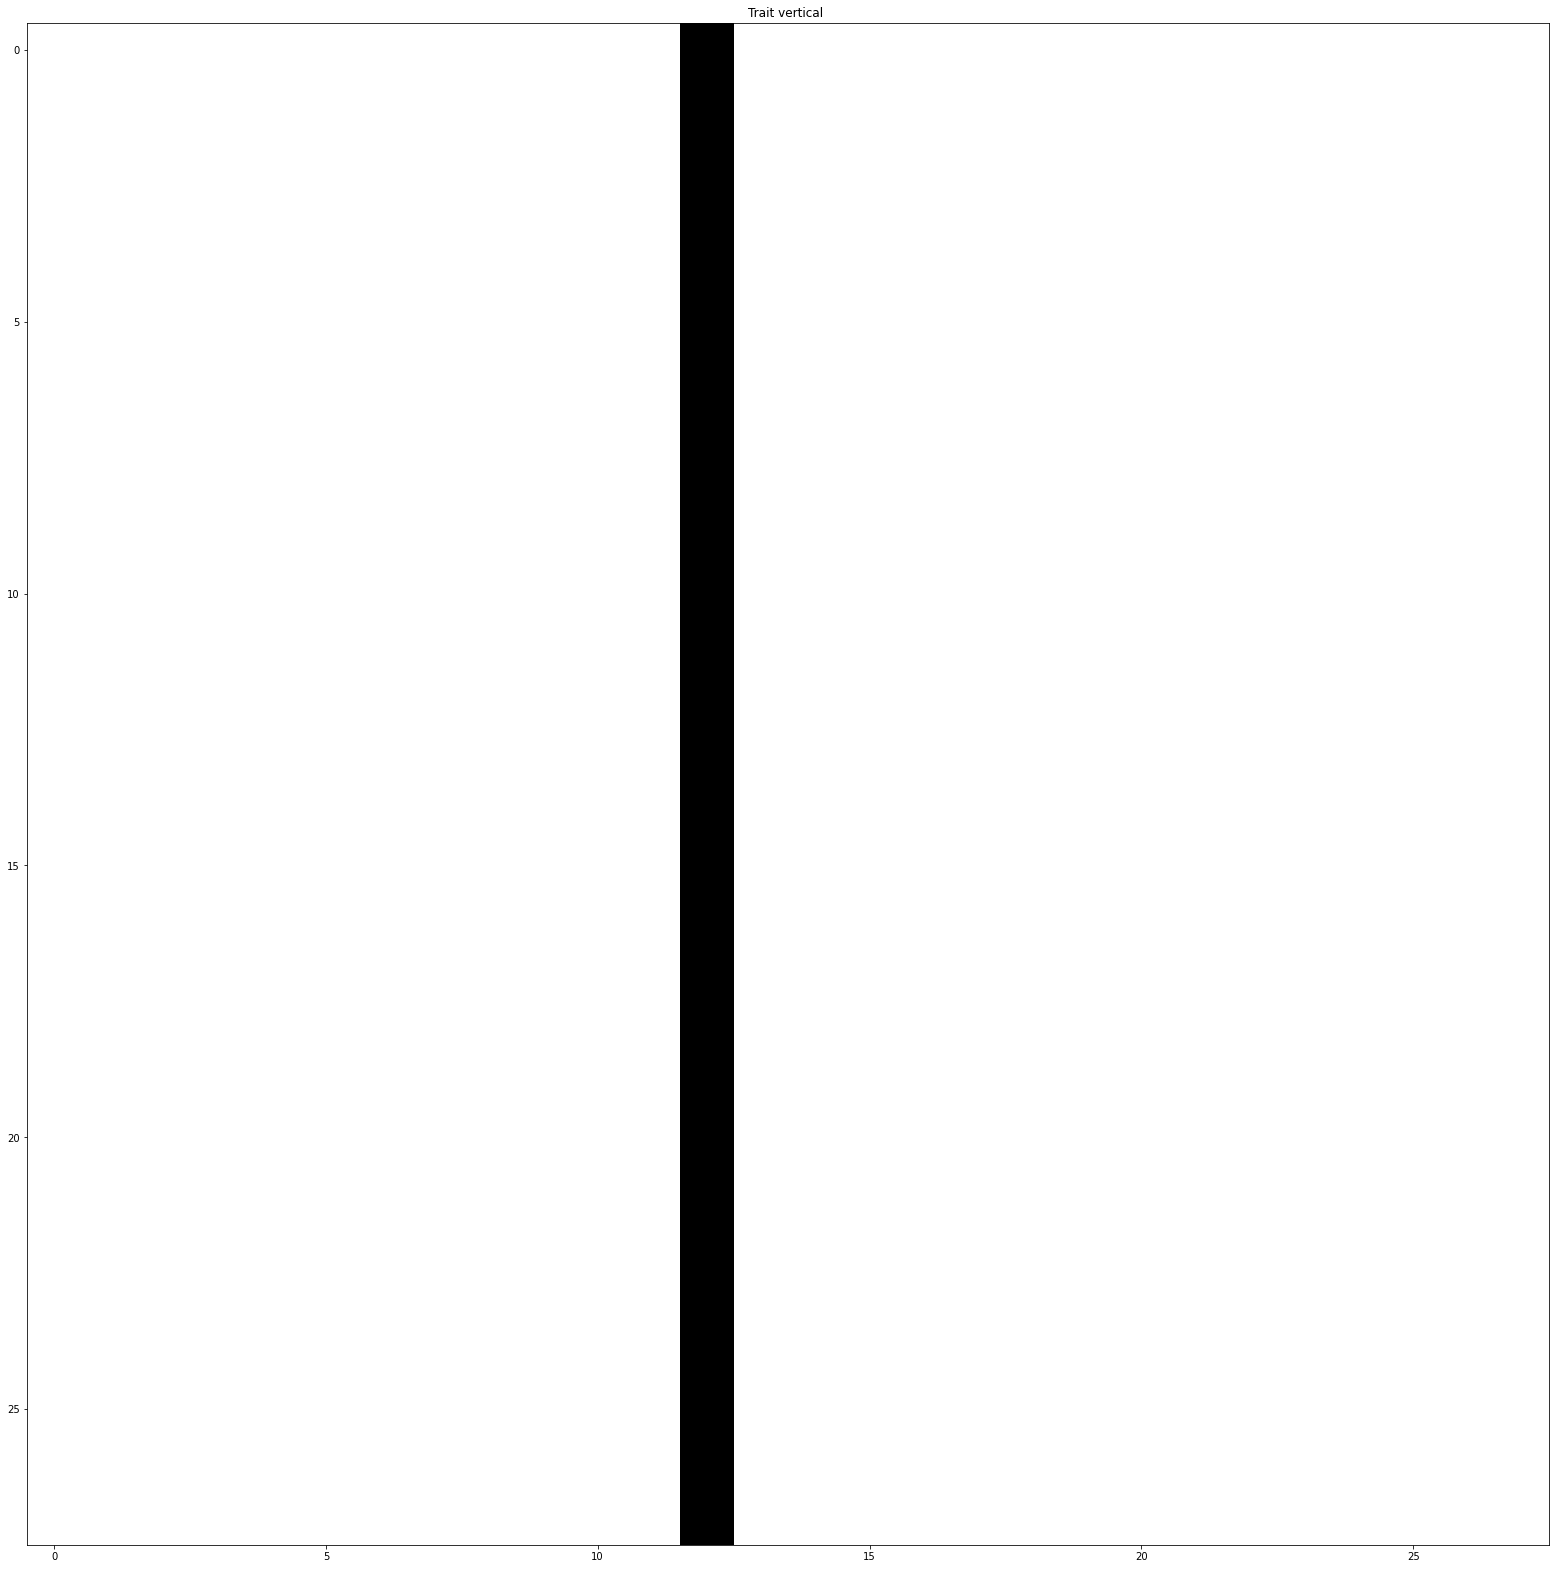

In [15]:
affiche('Trait vertical',ImageTest)

In [16]:
K_PlusProchesVoisins(ImageTest,limg,lval,k=4)

1

<h2>Machine learning proposé par des formateurs de l'académie de Reims</h2>

Chargement de tous les exemples d'apprentissages


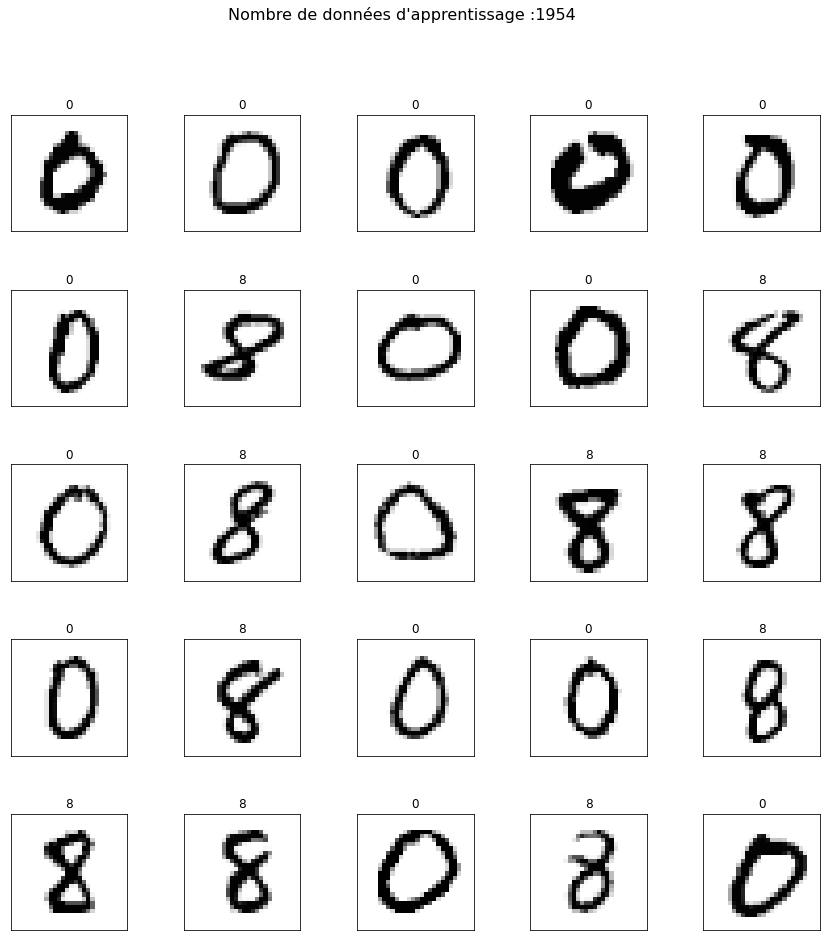

Chargement des données pour les tests
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 pl

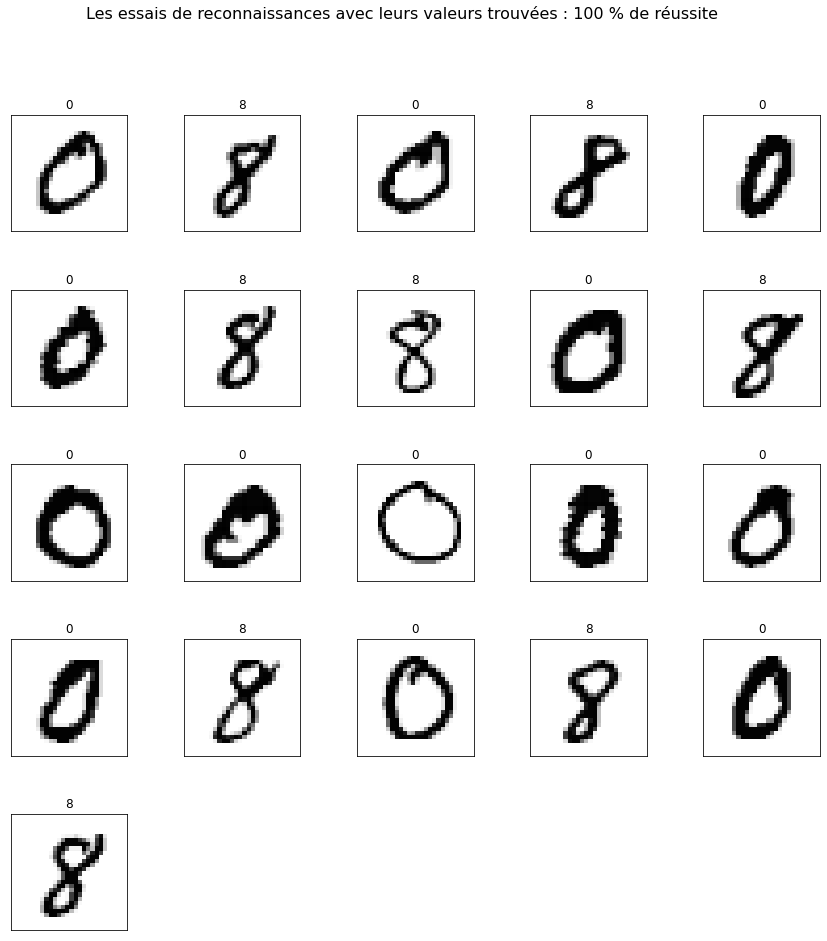

In [17]:
# -*- coding: utf-8 -*-
'''
======================
Algorithme des plus proches voisins
Crée par G.Valance en Python 3.4
Formation Python Académie de Reims 2018-2019

Une initiation à l'IA par la reconnaissance de caractère et l'algorithme des plus proches voisins.
Le programme charge des fichiers de test qui doivent se trouver dans le répertoire du programme
    Il s'agit de mnist_test.csv pour donner des exemples
    et mnist_train_100.csv pour donner des tests à faire subir à l'algorithme. C'est dans celui-ci que l'on peut ajouter ses propres dessins de chiffres.
On peut trouver ses fichiers sur : http://makeyourownneuralnetwork.blogspot.com/2015/03/the-mnist-dataset-of-handwitten-digits.html

On s'est limité à la reconnaissace de deux chiffres seulement mais on pourra étendre l'algorithme aux dix chiffres sans trop de difficultés

A Aller voir :
    https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn
    https://pjreddie.com/projects/mnist-in-csv/
    Pour le faire en réseau neuronale : https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html


A faire : injecter des faux exemples afin de voir à partir de quand l'algorithme flanche
====================
'''

import matplotlib.pyplot as plt
import numpy as np
from math import *
from random import *


def affiche(txt,tab_image):
    "Affiche une fenetre avec le texte et le tableau sous forme d'image"
    plt.figure(figsize=(15,15));
    plt.title("%s "%str(txt))
    plt.imshow(tab_image, cmap='Greys', interpolation='None')
    plt.show()

def Affiche_listes(ltxt,ltab_image,titre=""):
    "Affiche une fenetre avec les premiers éléments des listes textes et image"
    plt.figure(figsize=(15,15));
    plt.suptitle(titre, fontsize=16)
    for i in range(min(25,len(ltxt))):
        ax=plt.subplot(5,5,i+1)
        plt.subplots_adjust(hspace=0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([]) #Pour enlever les labels des axes https://www.science-emergence.com/Articles/Supprimer-les-labels-des-axes-sous-matplotlib/
        ax.xaxis.set_visible(False) #http://www.python-simple.com/python-matplotlib/configuration-axes.php
        ax.yaxis.set_visible(False)
        plt.title(str(ltxt[i])) #Le str est là pour convertir si jamais les txt étaient des nombres
        plt.imshow(ltab_image[i], cmap='Greys', interpolation='None')

    plt.show()

def chargement(nom_fichier):
    "Charge le fichier csv et renvoie la liste des valeurs et la liste des images qui y sont présentes"
    f = open(nom_fichier, 'r')
    a = f.readlines()
    f.close()

    liste_valeurs,liste_images=[],[]
    for line in a:
        linebits = line.split(',')
        liste_valeurs.append(int(linebits[0]))
        liste_images.append(np.asfarray(linebits[1:]).reshape((28,28)))

    return liste_valeurs,liste_images

def liste_extraites(lval,limg,val1=0,val2=1):
    "renvoie la liste des valeurs et la liste des images correspondant aux seules valeurs val1 et val2"
    lvalr,limgr=[],[]
    for k in range(len(lval)):
        if lval[k]==val1 or lval[k]==val2:
            lvalr.append(lval[k])
            limgr.append(limg[k])
    return lvalr,limgr

def valeur_par_kplusprochesvoisins(mon_image,lval,limg,k=10,val1=0,val2=1,mode_debug=False):
    "Renvoie une valeur estimée du chiffre représentée par mon_image à partir des exemples des listes d'images et de valeurs lval et limg "
    "Cela en appliquant l'algorithme des k plus proches voisins"
    "Le mode_debug permet de faire des tests de retour par la console"

    ldistval=[] # liste de la distance et de la valeur de chacune des images de la liste limg à mon_image
    for i in range(len(lval)):
        ldistval.append([distance(mon_image,limg[i]),lval[i]])
    ldistval.sort() #On trie cette liste selon les distances

    nb1,nb2=0,0 # Nb d'estmations de val1 ou val2
    for i in range(k): #Pour les k plus proches voisins
        if ldistval[i][1]==val1 : nb1=nb1+1 #On compte le nombre de fois où val1 se trouve dans les k plus proches voisins
        if ldistval[i][1]==val2 : nb2=nb2+1

    if mode_debug:
        print("Parmis les %d plus proches voisins de mon_image il y a %d chiffres %d et  %d chiffres %d"%(k,nb1,val1,nb2,val2))

    if nb1>nb2: return val1
    else: return val2

def distance(img1,img2):
    "Renvoie la distance entre deux images"
    "On calcule la moyenne des écarts entre chaque pixels"
    "Cette fonction gagnera à être programmée par les élèves selon leurs propres idées"
    imgdiff=abs(img1-img2)  #La matrice des écarts
    return imgdiff.mean()   #On renvoie la moyenne de ces écarts.

def demo(v1=0,v2=1):
    "Fais une démo de l'algorithme avec la reconnaissance des seuls chiffres v1 et v2"
    print("Chargement de tous les exemples d'apprentissages")
    lv,li=chargement("mnist_test.csv")   #lv et li sont des listes portant sur 10 chiffres
    lval,limage=liste_extraites(lv,li,v1,v2)       #lval et limage sont des listes ne portant que sur deux chiffres
    Affiche_listes(lval,limage,"Nombre de données d'apprentissage :%d"%len(lval))
    #affiche(lval[0],limage[0])

    print("Chargement des données pour les tests")
    lv,li=chargement("mnist_train_100.csv")
    lvalessai,limessai=liste_extraites(lv,li,v1,v2)
    #print("Nombre de données à tester :%d"%len(lvalessai))
    #affiche(lvalessai[0],limessai[0])

    nb_bonnes_reponses=0
    lval_reponse,ltxt_reponse=[],[]
    for i in range(0,len(lvalessai)):

        lval_reponse.append(valeur_par_kplusprochesvoisins(limessai[i],lval,limage,k=10,val1=v1,val2=v2,mode_debug=True))

        if lvalessai[i]==lval_reponse[i] :
            ltxt_reponse.append("Résussi")
            nb_bonnes_reponses=nb_bonnes_reponses+1
        else :ltxt_reponse.append("Echec:%d"%lval_reponse[i])

    Affiche_listes(lval_reponse,limessai,"Les essais de reconnaissances avec leurs valeurs trouvées : %1.0f %% de réussite"%(100.0*nb_bonnes_reponses/len(lval_reponse)))

demo(0,8) # Reconnaissance des 0 et 8